# Modeling (Scikit-Learn) Exercise

<hr>

## <span style="color: red;">Philip Vishnevsky</span>

## Part 1

Install scikit learn if you have not yet done so!

In [7]:
!pip install scikit-learn

### Import some libraries first

In [9]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations

## Load our data  

We are going to work with some mushroom data to classify if something is poisonous or not. Remember this from the python exercise? Instead of figuring out those if statements ourselves, we will have a model (specifically, decision trees) do it for us!

<img src="
https://cdn.shopify.com/s/files/1/0043/8439/1239/products/Cortina-KeychainPlush_1024x1024@2x.jpg?v=1630692639" alt="drawing" width="200"/>

In [11]:
mushrooms = [
    {"cap_diameter": 15, "cap_color": "purple", "stem_width": 2, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 25, "cap_color": "orange", "stem_width": 5, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 3, "cap_color": "green", "stem_width": 6, "has_skull":False, 'poisonous':False},
    {"cap_diameter": 8, "cap_color": "green", "stem_width": 3, "has_skull":False, 'poisonous':False},
    {"cap_diameter": 55, "cap_color": "green", "stem_width": 35, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 7, "cap_color": "purple", "stem_width": 6, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 3, "cap_color": "purple", "stem_width": 8, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 35, "cap_color": "green", "stem_width": 4, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 23, "cap_color": "green", "stem_width": 5, "has_skull":False, 'poisonous':False}
]

In the python exercise, we used a dictionary as our 'mushroom data.' Let's convert this now to a DataFrame.

In [13]:
df = pd.DataFrame(mushrooms)

In [14]:
df

,cap_diameter,cap_color,stem_width,has_skull,poisonous
0,15,purple,2,True,True
1,25,orange,5,True,True
2,3,green,6,False,False
3,8,green,3,False,False
4,55,green,35,False,True
5,7,purple,6,False,True
6,3,purple,8,True,True
7,35,green,4,False,True
8,23,green,5,False,False


## Understand our data

Changing the color palettes for fun. :)  
More info on palettes: https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette

In [17]:
sns.set_theme(palette="Accent")

In [18]:
# xkcd style :) 
sns.set_style('white')
#plt.xkcd();

### Do we have any nulls to deal with?

<font color="red">TODO: Check for nulls. How many nulls (if any) do we have?</font>

In [21]:
# TODO
df.isnull().sum()

cap_diameter    0
cap_color       0
stem_width      0
has_skull       0
poisonous       0
dtype: int64

Nope! This is a super small dataset.

### Do we have a balanced dataset?   
Check how many items of each class (poisonous or not) we have. Is it balanced (meaning, is it close having 50% for each class)?

<font color="red">TODO: Create a countplot of our `poisonous` column</font>

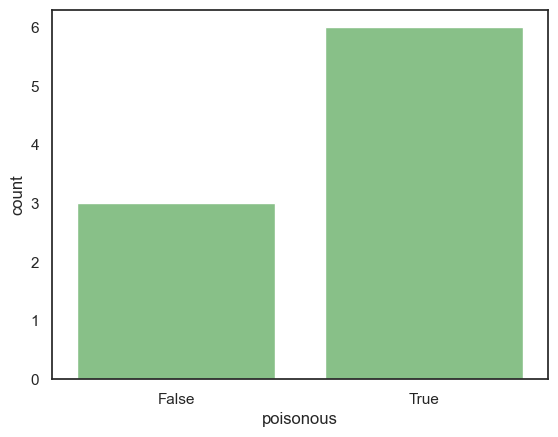

In [25]:
# TODO. Do something to answer this question. 
# A visualization or describing the data in some way (don't just manually count though!)
sns.countplot(data=df, x="poisonous")
plt.show()

Not really. We will have to keep this in mind later when evaluating our model.

### Is there a split among any of the features?  Which features seem useful for predicting our target value (poisonous)?

Here is an example.

<Axes: xlabel='cap_color', ylabel='count'>

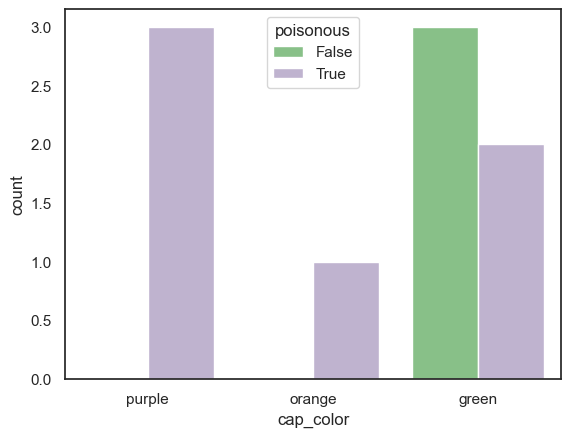

In [29]:
sns.countplot(x = 'cap_color', data=df, hue = 'poisonous')

Since the purple and orange cap colors are 100% for the poisonous class, this may be a helpful feature for classifying our mushrooms into poisonous or not.

<font color="red">TODO: Now try checking some other features on your own. Which features seem like they may be useful? What visualizations can be made to help you gain and understand of which features may be more relevant? </font>

<Axes: xlabel='cap_diameter', ylabel='count'>

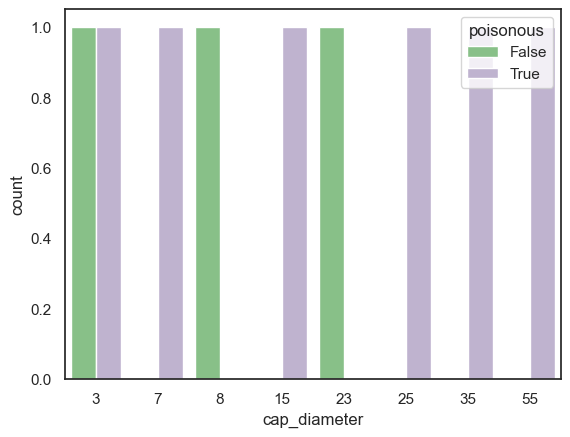

In [32]:
#TODO
sns.countplot(data=df, x="cap_diameter", hue='poisonous')

## Pre-processing: Preparing for our modeling  
First, let's check the datatypes of our columns.

In [34]:
df.dtypes

cap_diameter     int64
cap_color       object
stem_width       int64
has_skull         bool
poisonous         bool
dtype: object

We have ints, a string, and some booleans. We need to convert our string to numbers - something our model will be able to work with! 

<font color="red">Convert `cap_color` using `pd.get_dummies`. **Refer to the demo notebook for an example.**</font>

In [37]:
# TODO
df = pd.get_dummies(data=df, columns=['cap_color'])

Our dataframe should now look like this. Use this (below) tho check your work.

In [39]:
df.head()

,cap_diameter,stem_width,has_skull,poisonous,cap_color_green,cap_color_orange,cap_color_purple
0,15,2,True,True,False,False,True
1,25,5,True,True,False,True,False
2,3,6,False,False,True,False,False
3,8,3,False,False,True,False,False
4,55,35,False,True,True,False,False


### Set X (features) and y (target)  
<font color="red">TODO: Set our X and y values</font>

In [41]:
# TODO. Determine what is X (our features) and what is y (our target)
X = df.drop('poisonous', axis=1)
y = df['poisonous']

Your X and y should look like the below. Use this to check yourself before moving onward.

In [43]:
X.shape, y.shape

((9, 6), (9,))

In [44]:
X

,cap_diameter,stem_width,has_skull,cap_color_green,cap_color_orange,cap_color_purple
0,15,2,True,False,False,True
1,25,5,True,False,True,False
2,3,6,False,True,False,False
3,8,3,False,True,False,False
4,55,35,False,True,False,False
5,7,6,False,False,False,True
6,3,8,True,False,False,True
7,35,4,False,True,False,False
8,23,5,False,True,False,False


In [45]:
y

0     True
1     True
2    False
3    False
4     True
5     True
6     True
7     True
8    False
Name: poisonous, dtype: bool

### Split into train and test  
First, let's import what we need from scikit learn.

In [47]:
from sklearn.model_selection import train_test_split

<font color="red">TODO: Now write the line of code to get our `X_train`, `X_test`, `y_train` and `y_test` using only 20% of our data as the test size.</font>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The shapes should look like the below. Use this to check yourself. Also note that our dataset is currently very small to begin with. The test subset will be even smaller.

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 6), (2, 6), (7,), (2,))

## Modeling!  
For the sake of this exercise, we will be working with decision trees. We will learn more about how they work next week.  

Again, we start by importing what we need from scikit learn.

In [53]:
from sklearn import tree

<font color="red">TODO: Create our decision tree classifier and fit it using our training dataset.</font>

In [55]:
# TODO
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [56]:
# TODO
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluate!

<font color="red">TODO: Use our classifier now to predict the target values of our testing dataset. </font>

In [59]:
# TODO
predicted = dtc.predict(X_test)

In [60]:
predicted

array([ True, False])

We got a 100% accuracy. Normally this would be incredibly suspicious... but given the tiny size of our dataset, this is OK (we will work with more data soon!).

<font color="red">TODO: Get the accuracy score.</font>

In [62]:
# TODO
dtc.score(X_test, y_test)

1.0

Now let's visualize our tree so we can see what's going on! (Again, refer to the demo code for examples.)

In [64]:
import matplotlib.pyplot as plt

<font color="red">TODO: Create a visualization of our decision tree.</font>

[Text(0.4, 0.8333333333333334, 'cap_color_green <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = False'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = False'),
 Text(0.6, 0.5, 'cap_diameter <= 29.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = True'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = True'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = False')]

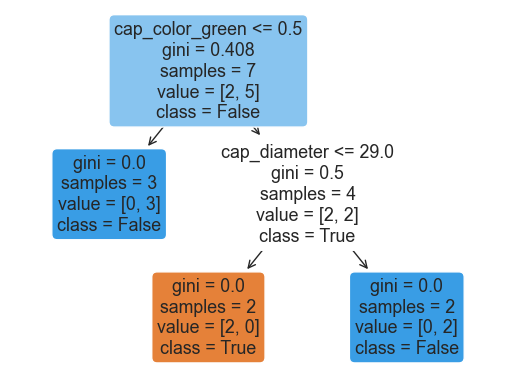

In [66]:
tree.plot_tree(dtc, feature_names=X.columns, class_names=y.unique().astype(str).tolist(), rounded=True, filled=True)

### Let's say we had a new mushroom...  
```new_mushroom = {"cap_diameter": 18, "cap_color": "orange", "stem_width": 7, "has_skull":True}```  
<font color="red">TODO: What would this new mushroom be classified as? Use the tree above to answer.</font>

FALSE

### What was the most important feature according to this decision tree?  What was the next most important feature?
<font color="red">TODO: Answer the question above and make a visualization. Refer to the demo!</font>

/var/folders/b4/905cbxgs1d1_9s92t1p978hw0000gn/T/ipykernel_49217/53131498.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
/var/folders/b4/905cbxgs1d1_9s92t1p978hw0000gn/T/ipykernel_49217/53131498.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


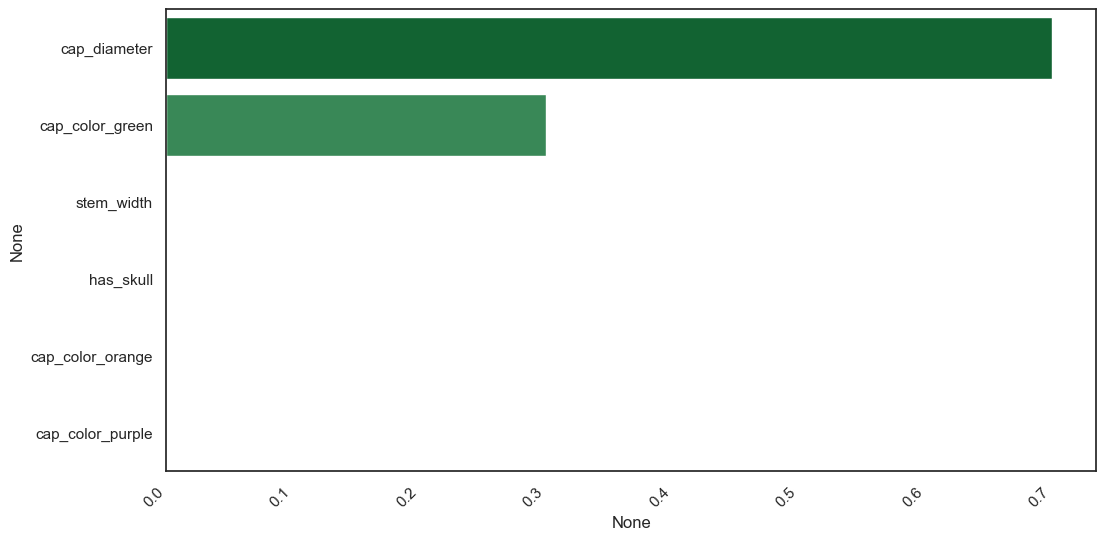

In [70]:
# TODO
fi = dtc.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<hr>

## Part 2
Now let's work with a larger dataset!

## Load the data

<font color="red">TODO: Read in your `mushroom.csv`</font>

In [75]:
df = pd.read_csv("./data/mushrooms.csv")

It should look something like the following:

In [77]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [78]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Data understanding and pre-processing

As just a quick check, we have no nulls to deal with:

In [81]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Moving on~

### Is out data balanced?  
<font color="red">TODO: Let's make the same countplot as a quick check! Our target value is now called `class` instead of `poisonous`.</font>

<Axes: xlabel='class', ylabel='count'>

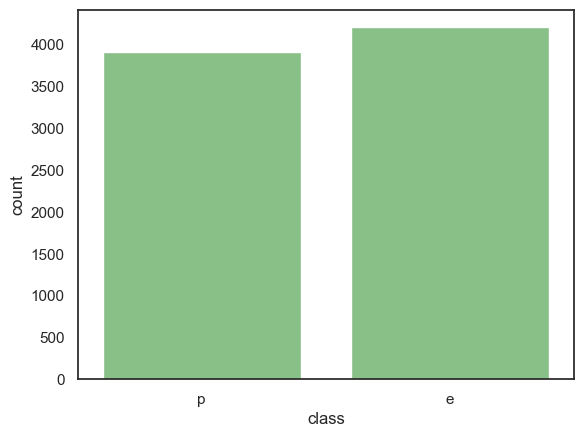

In [84]:
sns.countplot(data=df, x="class")

In [85]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

This looks rather balanced!

### Explore the data! Which features look relevant?  
<font color="red">TODO: Same as before! Go through and explore the data. Answer: which features look relevant and why (point to any visualizations you make)?</font>

<Axes: xlabel='cap-color', ylabel='count'>

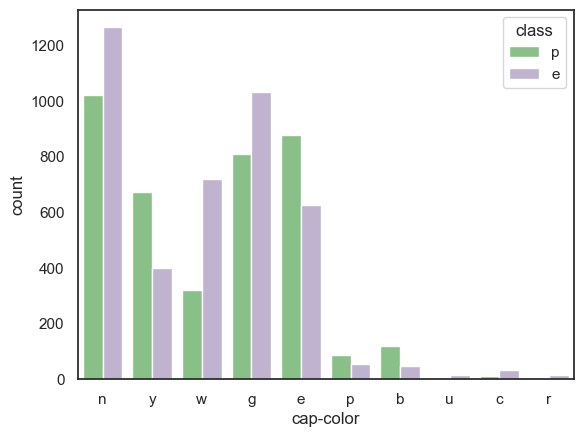

In [88]:
sns.countplot(x = 'cap-color', data=df, hue = 'class')

<Axes: xlabel='cap-shape', ylabel='count'>

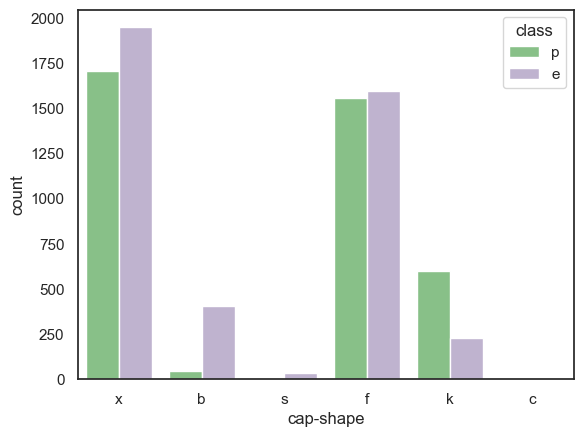

In [89]:
sns.countplot(x='cap-shape', data=df, hue='class')

### Convert feature datatypes  
Notice how *all* the columns are strings. We will need to convert these to integers now.

In [91]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<font color="red">TODO: Let's use `pd.get_dummies()` again. You will need to select all the columns except `class` (our target value).</font>

In [93]:
# TODO
columns = df.columns.drop('class')
df = pd.get_dummies(data=df, columns=columns)

It should look like this once you are done (below). We have 119 columns now!

In [95]:
df

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,e,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,e,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,p,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,e,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8120,e,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
8121,e,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8122,p,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


### Get our X and y
<font color="red">TODO: Now set our X (all the features) and y (just the class).

In [97]:
# TODO
X = df.drop('class', axis=1)
y = df['class']

Here is what the `X` and `y` should look like.

In [99]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [100]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

### Split into training and testing sets  
<font color="red">TODO: Split into `X_train`, `X_test`, `y_train`, and `y_test` using 50% this time for the test size. </font>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

The shapes should look like this:

In [104]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4062, 117), (4062,), (4062, 117), (4062,))

## Modeling!  
<font color="red">TODO: Now let's train our model!</font>

In [106]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluating  
<font color="red">TODO: Now let's get the accuracy. Use the `score` method to do so.</font>

In [108]:
dtc.score(X_test, y_test)

1.0

<font color="red">TODO: Plot that decision tree!</font>

[Text(0.5882352941176471, 0.9375, 'odor_n <= 0.5\ngini = 0.5\nsamples = 4062\nvalue = [2065, 1997]\nclass = p'),
 Text(0.35294117647058826, 0.8125, 'stalk-root_c <= 0.5\ngini = 0.276\nsamples = 2320\nvalue = [383, 1937]\nclass = e'),
 Text(0.23529411764705882, 0.6875, 'stalk-root_r <= 0.5\ngini = 0.12\nsamples = 2051\nvalue = [132, 1919]\nclass = e'),
 Text(0.17647058823529413, 0.5625, 'odor_a <= 0.5\ngini = 0.043\nsamples = 1962\nvalue = [43, 1919]\nclass = e'),
 Text(0.11764705882352941, 0.4375, 'odor_l <= 0.5\ngini = 0.021\nsamples = 1940\nvalue = [21, 1919]\nclass = e'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 1919\nvalue = [0, 1919]\nclass = e'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = p'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = p'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = p'),
 Text(0.47058823529411764, 0.6875, 'stalk-sur

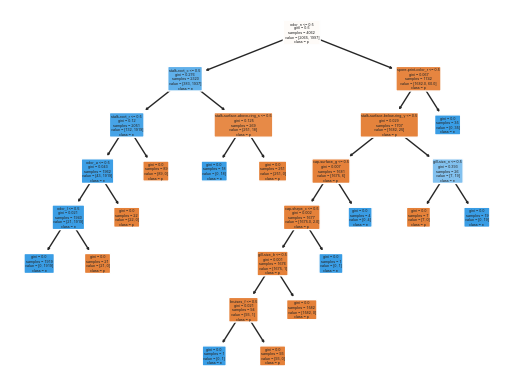

In [110]:
tree.plot_tree(dtc, feature_names=X.columns, class_names=y.unique().astype(str).tolist(), rounded=True, filled=True)

<font color="red">TODO: Get and display the feature importances. Note: You will probably want to make the figure size longer/taller so it is easier to read. Discuss this. Which ones are most important? </font>

/var/folders/b4/905cbxgs1d1_9s92t1p978hw0000gn/T/ipykernel_49217/1380250463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
/var/folders/b4/905cbxgs1d1_9s92t1p978hw0000gn/T/ipykernel_49217/1380250463.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


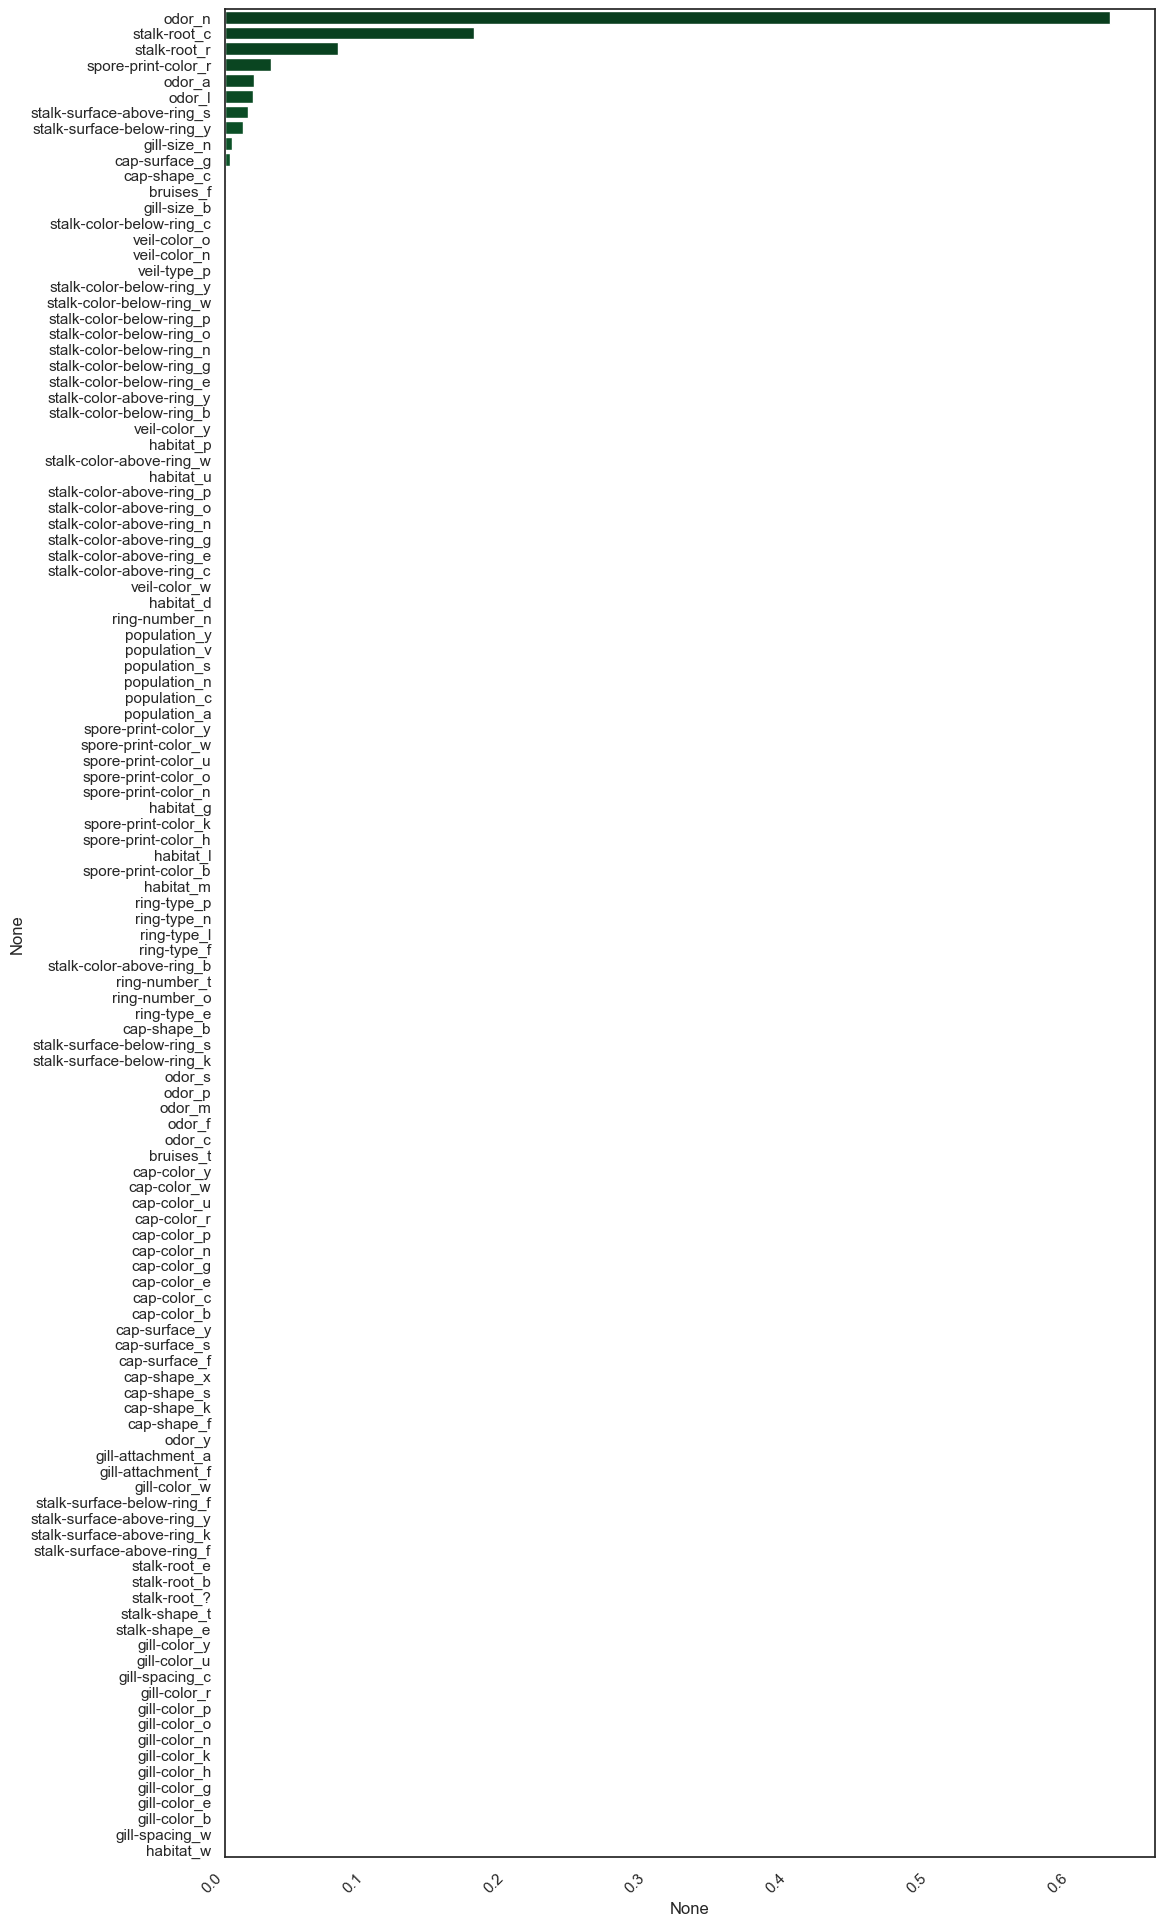

In [112]:
fi = dtc.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending
plt.figure(figsize=(12, 24))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The most important ones are the odor_n, bruises_f, odor_p, spore-print-color_h, and spore-print-color_r

<font color="red">TODO: The basic accuracy (using `score` above) is a good place to start for evaluation. However, using the classification report gives us much more detail and a better overview of the performance.</font>

In [115]:
from sklearn import metrics

In [116]:
predicted = dtc.predict(X_test)

In [117]:
# TODO
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           e       1.00      1.00      1.00      2143\n           p       1.00      1.00      1.00      1919\n\n    accuracy                           1.00      4062\n   macro avg       1.00      1.00      1.00      4062\nweighted avg       1.00      1.00      1.00      4062\n'

We see that everything is quite high. This is likely because of the nature of our dataset

Now let's look at the **confusion matrix** too!

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
confusion_matrix(y_test, predicted)

array([[2143,    0],
       [   0, 1919]])

In the above confusion matrix, the top left corner shows the mushrooms that were edible and correctly classified as edible. The bottom right corner shows mushrooms that were poisonous and correctly classified as poisonous. The bottom left shows those that were predicted as edible but were actually poisonous. And finally, the top right shows those that were predicted as poisonous but were actually edible.    

See the image below for a brief visual of a confusion matrix. In our case, positive = edible and negative = poisonous.

<img src="
https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/3_confusion_matrix.png?ssl=1" alt="drawing" width="800"/>


<font color="red">TODO: Answer the following. In this situation, which one is more dangerous: false positives (incorrectly predicted as edible) or false negatives (incorrectly predicted as poisonous). Explain why.

In this case, false positives are more dangerous, because it can result in actually poisonous mushrooms being eaten, as they were mistakenly labeled as safe. It is much more dangerous than false negatives, because those simply will not get eaten, even if they are actually safe.